In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [33]:
df = pd.read_csv('tinder.csv')

#processing
#1 sostituisci in colonna Answer i valori I don't use Tinder con No
df['Answer'] = df['Answer'].replace("I don't use Tinder", 'No')
df

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
2,292885,Mobile,Mobile respondents,No,1090,0.283,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
4,292889,Web,Web-based respondents,No,0,0.000,No
...,...,...,...,...,...,...,...
448,293777,University,Boston College,No,4,0.800,Yes
449,293779,University,Boston College,No,1,0.200,No
450,293781,University,Boston University,Yes,2,0.333,Yes
451,293783,University,Boston University,No,3,0.500,No


In [34]:
print("I segment type sono:",(df['Segment Type'].unique()))
print("I segment description sono:",len(df['Segment Description'].unique()))
print("I answer sono:",(df['Answer'].unique()))
print("I became a relationship sono:",(df['It became a Relationship'].unique()))

I segment type sono: ['Mobile' 'Web' 'Gender' 'University']
I segment description sono: 151
I answer sono: ['Yes' 'No']
I became a relationship sono: ['Yes' 'No']


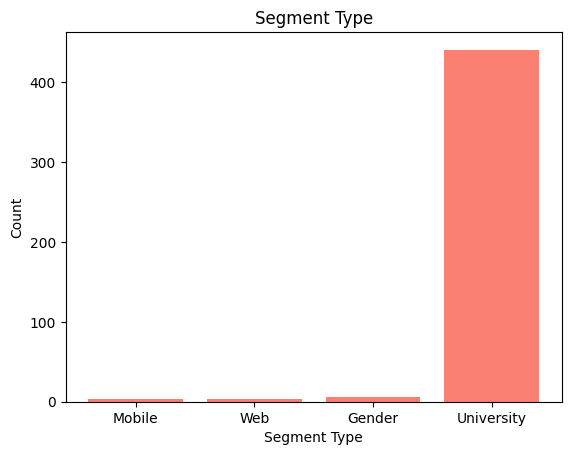

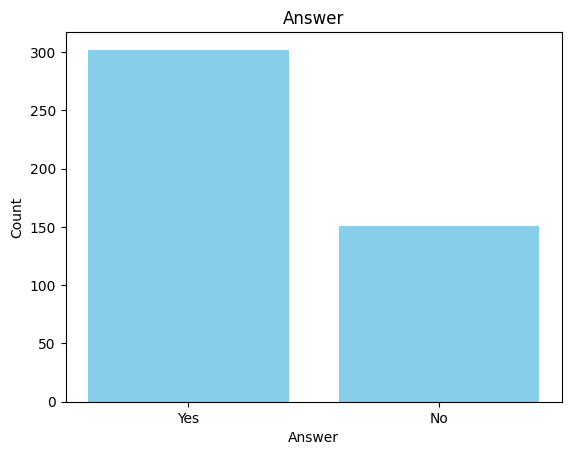

In [35]:
segment_type_unique = df['Segment Type'].unique()
count_segment_type = [len(df[df['Segment Type'] == i]) for i in segment_type_unique]

plt.bar(segment_type_unique, count_segment_type, color='salmon')
plt.title('Segment Type')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.show()

answer_unique = df['Answer'].unique()
count_answer = df['Answer'].value_counts()

plt.bar(answer_unique, count_answer, color='skyblue')
plt.title('Answer')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.show()

In [36]:
df_answer_si = df[df['Answer'] == 'Yes']
df_answer_no = df[df['Answer'] == 'No']

n_risposte_si = len(df_answer_si)
n_risposte_no = len(df_answer_no)

n_risposte_si_in_rel_si = len(df_answer_si[df_answer_si['It became a Relationship'] == 'Yes'])
n_risposte_si_in_rel_no = len(df_answer_si[df_answer_si['It became a Relationship'] == 'No'])
n_risposte_no_in_rel_si = len(df_answer_no[df_answer_no['It became a Relationship'] == 'Yes'])
n_risposte_no_in_rel_no = len(df_answer_no[df_answer_no['It became a Relationship'] == 'No'])

print("Numero di risposte si:", n_risposte_si)
print("Numero di risposte no:", n_risposte_no)
print("Numero di risposte si in rel si:", n_risposte_si_in_rel_si)
print("Numero di risposte si in rel no:", n_risposte_si_in_rel_no)
print("Numero di risposte no in rel si:", n_risposte_no_in_rel_si)
print("Numero di risposte no in rel no:", n_risposte_no_in_rel_no)


Numero di risposte si: 151
Numero di risposte no: 302
Numero di risposte si in rel si: 44
Numero di risposte si in rel no: 107
Numero di risposte no in rel si: 86
Numero di risposte no in rel no: 216


C:\Users\EdoardoBuono\AppData\Local\Temp\ipykernel_28544\1292844896.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


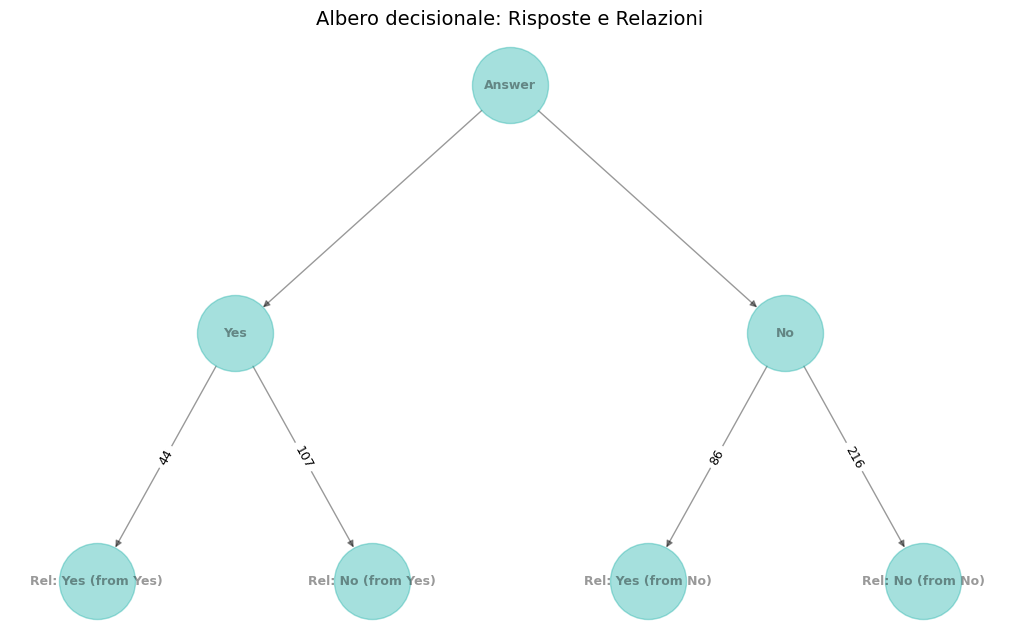

In [37]:


# Crea grafo diretto
G = nx.DiGraph()

# Nodi
G.add_node("Answer")
G.add_node("Yes")
G.add_node("No")
G.add_node("Rel: Yes (from Yes)")
G.add_node("Rel: No (from Yes)")
G.add_node("Rel: Yes (from No)")
G.add_node("Rel: No (from No)")

# Archi
G.add_edge("Answer", "Yes")
G.add_edge("Answer", "No")

G.add_edge("Yes", "Rel: Yes (from Yes)", weight=n_risposte_si_in_rel_si)
G.add_edge("Yes", "Rel: No (from Yes)", weight=n_risposte_si_in_rel_no)
G.add_edge("No", "Rel: Yes (from No)", weight=n_risposte_no_in_rel_si)
G.add_edge("No", "Rel: No (from No)", weight=n_risposte_no_in_rel_no)

# Posizioni fisse per struttura ad albero verticale
pos = {
    "Answer": (0, 3),
    "Yes": (-1, 2),
    "No": (1, 2),
    "Rel: Yes (from Yes)": (-1.5, 1),
    "Rel: No (from Yes)": (-0.5, 1),
    "Rel: Yes (from No)": (0.5, 1),
    "Rel: No (from No)": (1.5, 1),
}

# Disegna il grafo
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightseagreen", font_size=9, alpha= 0.4, font_weight="bold", arrows=True)

# Etichette con i pesi solo sui rami finali
edge_labels = {
    ("Yes", "Rel: Yes (from Yes)"): n_risposte_si_in_rel_si,
    ("Yes", "Rel: No (from Yes)"): n_risposte_si_in_rel_no,
    ("No", "Rel: Yes (from No)"): n_risposte_no_in_rel_si,
    ("No", "Rel: No (from No)"): n_risposte_no_in_rel_no,
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Albero decisionale: Risposte e Relazioni", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


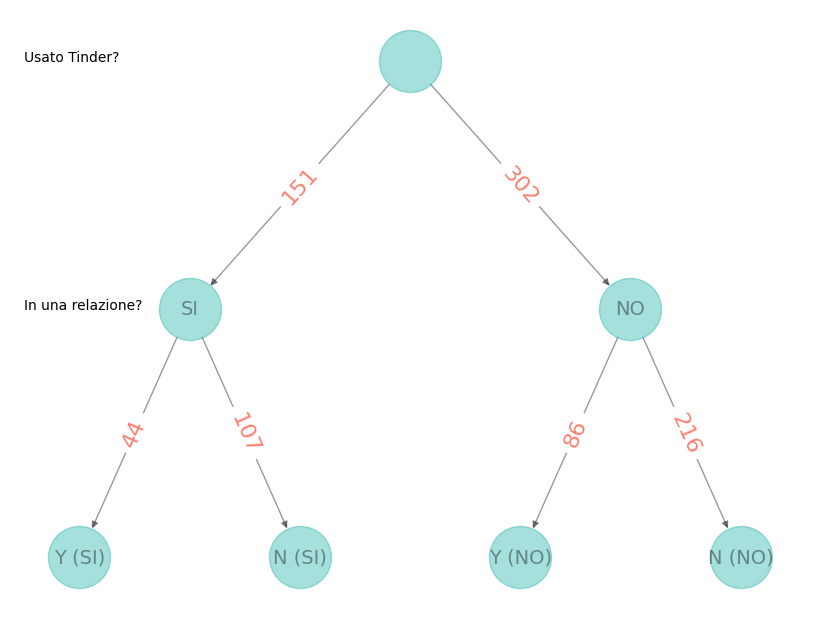

In [38]:
G = nx.DiGraph()

# Aggiungi nodi e archi
G.add_edges_from([
    (' ', 'SI'),
    (' ', 'NO'),
    ('SI', 'Y (SI)'),
    ('SI', 'N (SI)'),
    ('NO', 'Y (NO)'),
    ('NO', 'N (NO)'),
])

# Posizioni fisse dei nodi
pos = {
    ' ': (0, 0),
    'SI': (-2, -1),
    'NO': (2, -1),
    'Y (SI)': (-3, -2),
    'N (SI)': (-1, -2),
    'Y (NO)': (1, -2),
    'N (NO)': (3, -2),
}

# metti sui link i valori n_risposte_si, n_risposte_no, n_risposte_si_in_rel_si, n_risposte_no_in_rel_si, n_risposte_si_in_rel_no, n_risposte_no_in_rel_no
labels = {
    (' ', 'SI'): n_risposte_si,
    (' ', 'NO'): n_risposte_no,
    ('SI', 'Y (SI)'): n_risposte_si_in_rel_si,
    ('SI', 'N (SI)'): n_risposte_si_in_rel_no,
    ('NO', 'Y (NO)'): n_risposte_no_in_rel_si,
    ('NO', 'N (NO)'): n_risposte_no_in_rel_no,
}

# Disegna
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightseagreen', font_size=14, alpha = 0.4)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='salmon', font_size=16)

plt.text(-3.5, 0, 'Usato Tinder?', fontsize=10, color='black')
plt.text(-3.5, -1, 'In una relazione?', fontsize=10, color='black')
plt.show()

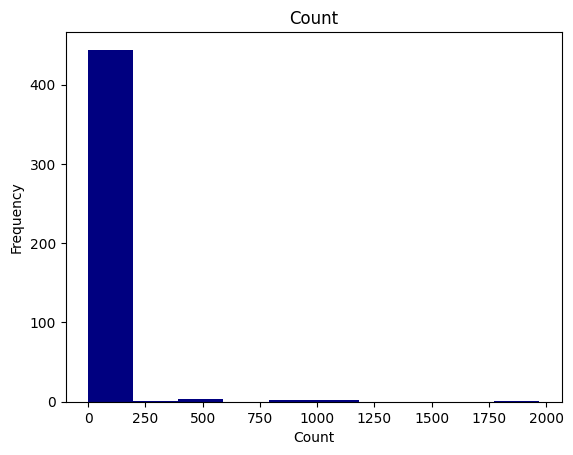

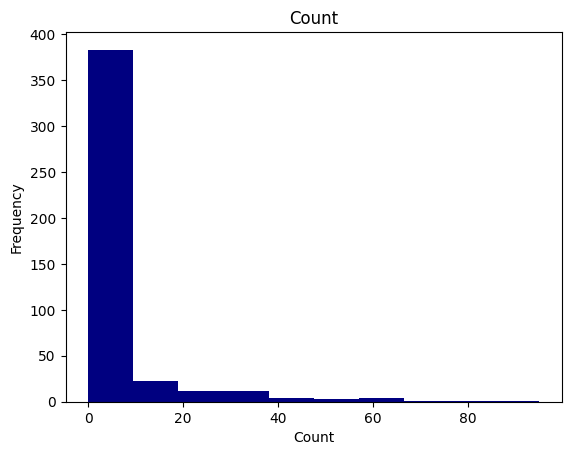

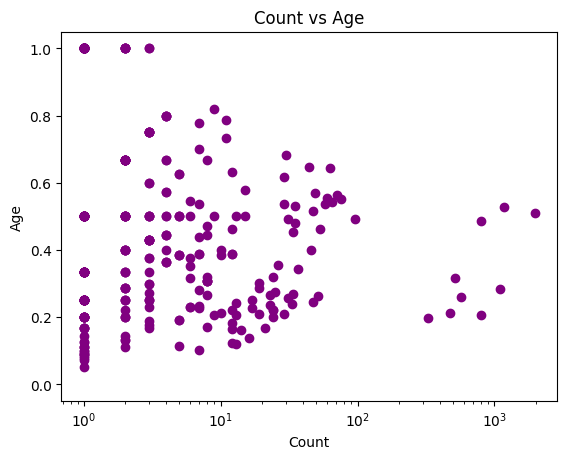

In [39]:
plt.hist(df['Count'], color = 'navy', bins = 10)
plt.title('Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

df_filt= df[df['Count']<200]
plt.hist(df_filt['Count'], color = 'navy', bins = 10)
plt.title('Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

plt.scatter(df['Count'], df['Percentage'], color = 'purple')
plt.title('Count vs Age')
plt.xscale('log')
plt.xlabel('Count')
plt.ylabel('Age')
plt.show()

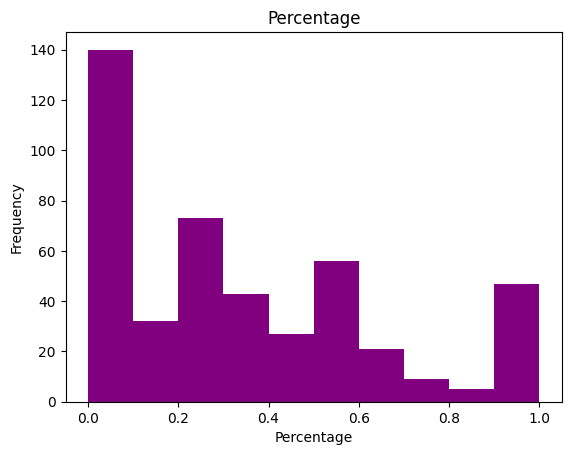

In [40]:
plt.hist(df['Percentage'], color = 'purple', bins = 10)
plt.title('Percentage')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

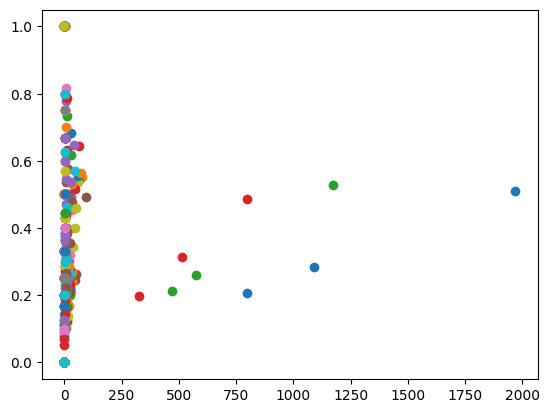

In [ ]:
for sd in df['Segment Description'].unique():
   print(f"Segment Description: {sd}")